In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [105]:
well_data = pd.read_excel('../data/Data-Wells.xlsx')


In [106]:
well_data.head(3)


,Sample ID,Well Name,Entered,"1,4-Dioxane Results (ppb)",Date Sampled,Time Sampled,Date Received,Date Analyzed,Reporting Limit,Reporting Lab,...,Well Comments,Scr Elev Range,bar color,BegFolder KML,EndFolder KML,BegFolder2KML,EndFolder2KML,Max-to-date.1,MaxToDateFlag,Last Date Rd
0,76970,1021 Westview Way,05/10/19,nd,05/08/19,14:05,NaN,05/15/19,1.0,PLS,...,NaN,NaN,green,<Folder><name>1021 Westview Way</name>,</Folder>,<Folder><name>n/a</name>,NaN,0.001,NaN,2019-05-08 00:00:00
1,76971,1024 Westview Way,05/10/19,nd,05/08/19,14:18,NaN,05/15/19,1.0,PLS,...,NaN,NaN,green,<Folder><name>1024 Westview Way</name>,</Folder>,NaN,NaN,0.001,NaN,2019-05-08 00:00:00
2,76969,1049 Westview Way,05/10/19,nd,05/08/19,14:43,NaN,05/14/19,1.0,PLS,...,NaN,NaN,green,<Folder><name>1049 Westview Way</name>,</Folder>,NaN,</Folder>,0.001,NaN,2019-05-08 00:00:00


In [126]:
mw22 = well_data.loc[well_data['Well Name'] == 'MW-22'].copy()
mw22.loc[:, 'ds']= pd.to_datetime(mw22['Date Sampled'])
mw22.loc[:, 'dioxane_results']= pd.to_numeric(mw22['1,4-Dioxane Results (ppb)'])
mw22.head(5)

,Sample ID,Well Name,Entered,"1,4-Dioxane Results (ppb)",Date Sampled,Time Sampled,Date Received,Date Analyzed,Reporting Limit,Reporting Lab,...,bar color,BegFolder KML,EndFolder KML,BegFolder2KML,EndFolder2KML,Max-to-date.1,MaxToDateFlag,Last Date Rd,ds,dioxane_results
13157,115,MW-22,NaN,63000,07/23/87,NaN,NaN,NaN,1.0,NaN,...,purple,<Folder><name>MW-22</name>,NaN,<Folder><name>860-880</name>,NaN,63000.0,MaxToDate,2019-10-30 00:00:00,1987-07-23,63000
13158,116,MW-22,NaN,83000,07/23/87,NaN,NaN,NaN,1.0,NaN,...,purple,NaN,NaN,NaN,NaN,83000.0,MaxToDate,2019-10-30 00:00:00,1987-07-23,83000
13159,117,MW-22,NaN,60000,07/23/87,NaN,NaN,NaN,1.0,NaN,...,purple,NaN,NaN,NaN,NaN,83000.0,NaN,2019-10-30 00:00:00,1987-07-23,60000
13160,180,MW-22,NaN,70000,10/17/87,NaN,NaN,NaN,1.0,NaN,...,purple,NaN,NaN,NaN,NaN,83000.0,NaN,2019-10-30 00:00:00,1987-10-17,70000
13161,229,MW-22,NaN,63000,04/14/88,NaN,NaN,NaN,1.0,NaN,...,purple,NaN,NaN,NaN,NaN,83000.0,NaN,2019-10-30 00:00:00,1988-04-14,63000


In [128]:
di_time = mw22.iloc[:, lambda df: df.columns.str.contains('ds|dioxane_results',
                                              case=False)].copy()
di_time.rename(columns = {'dioxane_results':'y'}, inplace = True)
di_time.head()

,ds,y
13157,1987-07-23,63000
13158,1987-07-23,83000
13159,1987-07-23,60000
13160,1987-10-17,70000
13161,1988-04-14,63000


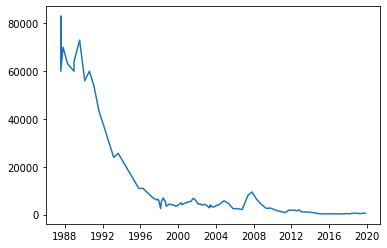

In [129]:
test = di_time
plt.plot(test.ds, test.y)
plt.show()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds         yhat   yhat_lower   yhat_upper
0 2020-01-01  1463.741700 -2705.815152  5662.227158
1 2020-02-01  2509.996370 -1714.508124  6752.361353
2 2020-03-01 -3048.673771 -7477.486267  1334.534700
3 2020-04-01 -2273.228877 -6333.330572  1965.470826
4 2020-05-01   554.613726 -3728.388157  5019.756331


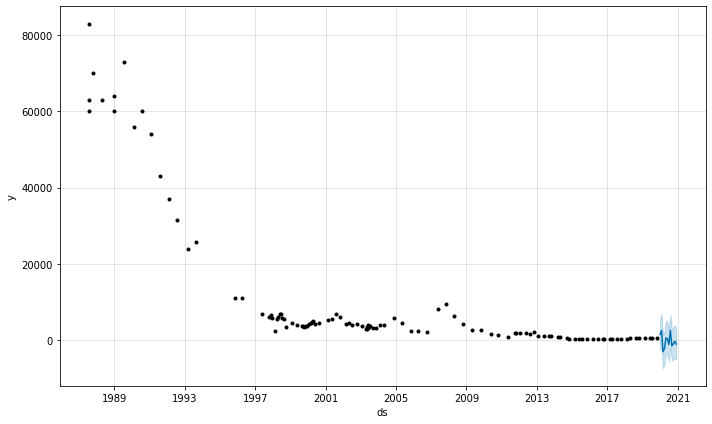

In [132]:
model = Prophet()
# fit the model
model.fit(di_time)
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '2020-%02d' % i
	future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
plt.show()